In [14]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.16.1


In [15]:
import tensorflow as tf

# Check if TensorFlow can see the GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs detected:")
    for gpu in gpus:
        print(gpu)
else:
    print("No GPUs detected")


No GPUs detected


In [16]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [3]:
import pandas as pd
data = pd.read_csv('rolling_feature.csv')


print(data.info())
data.head()
data = data.drop(columns=['index'])
data['Target'] = data['Target'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            14876 non-null  int64  
 1   Volume_t-5       14876 non-null  float64
 2   SMA_20_t-5       14876 non-null  float64
 3   EMA_20_t-5       14876 non-null  float64
 4   RSI_t-5          14876 non-null  float64
 5   MACD_t-5         14876 non-null  float64
 6   MACD_Signal_t-5  14876 non-null  float64
 7   Up_t-5           14876 non-null  float64
 8   Down_t-5         14876 non-null  float64
 9   Change_t-5       14876 non-null  float64
 10  Volume_t-4       14876 non-null  float64
 11  SMA_20_t-4       14876 non-null  float64
 12  EMA_20_t-4       14876 non-null  float64
 13  RSI_t-4          14876 non-null  float64
 14  MACD_t-4         14876 non-null  float64
 15  MACD_Signal_t-4  14876 non-null  float64
 16  Up_t-4           14876 non-null  float64
 17  Down_t-4    

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Volume_t-5,14876.0,1.407360e+09,1.840241e+09,1.950000e+06,2.144750e+07,2.448150e+08,3.067910e+09,1.145623e+10
SMA_20_t-5,14876.0,9.678022e+02,1.153874e+03,5.500000e+01,1.030894e+02,4.423460e+02,1.336809e+03,5.352509e+03
EMA_20_t-5,14876.0,9.678205e+02,1.153766e+03,5.554703e+01,1.030977e+02,4.425243e+02,1.337286e+03,5.368112e+03
RSI_t-5,14876.0,5.359290e+01,1.260681e+01,1.135964e+01,4.476640e+01,5.439452e+01,6.289679e+01,8.586217e+01
MACD_t-5,14876.0,2.359106e+00,1.665944e+01,-2.370202e+02,-8.132427e-01,6.911911e-01,5.268698e+00,9.258371e+01
MACD_Signal_t-5,14876.0,2.348271e+00,1.558214e+01,-1.986407e+02,-7.225413e-01,6.702142e-01,5.082285e+00,8.188411e+01
Up_t-5,14876.0,6.896867e-03,6.936692e-03,3.236181e-06,2.317434e-03,5.474890e-03,9.259890e-03,2.573386e-01
Down_t-5,14876.0,-7.113493e-03,6.267044e-03,-1.016142e-01,-9.345851e-03,-5.827564e-03,-3.144633e-03,-3.780052e-06
Change_t-5,14876.0,-5.066136e-05,1.016000e-02,-2.573386e-01,-4.468648e-03,2.527297e-04,4.813874e-03,1.037823e-01
Volume_t-4,14876.0,1.407815e+09,1.840731e+09,1.950000e+06,2.145750e+07,2.449450e+08,3.068898e+09,1.145623e+10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Volume_t-5       14876 non-null  float64
 1   SMA_20_t-5       14876 non-null  float64
 2   EMA_20_t-5       14876 non-null  float64
 3   RSI_t-5          14876 non-null  float64
 4   MACD_t-5         14876 non-null  float64
 5   MACD_Signal_t-5  14876 non-null  float64
 6   Up_t-5           14876 non-null  float64
 7   Down_t-5         14876 non-null  float64
 8   Change_t-5       14876 non-null  float64
 9   Volume_t-4       14876 non-null  float64
 10  SMA_20_t-4       14876 non-null  float64
 11  EMA_20_t-4       14876 non-null  float64
 12  RSI_t-4          14876 non-null  float64
 13  MACD_t-4         14876 non-null  float64
 14  MACD_Signal_t-4  14876 non-null  float64
 15  Up_t-4           14876 non-null  float64
 16  Down_t-4         14876 non-null  float64
 17  Change_t-4  

In [6]:
X = data.drop('Target', axis=1)
y = data['Target']

In [7]:
len = data.shape[0]
len

14876

In [8]:
#set ratio
ratio = 0.75
X_train = X[X.index <=len*ratio]
X_test = X[X.index>len*ratio]
y_train = y[y.index <=len*ratio]
y_test = y[y.index >len*ratio]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.feature_selection import RFECV
from imblearn.pipeline import Pipeline as imbpipeline
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


In [21]:
class multiple_training2():
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.methods = []
        self.models = []
        self.feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]

    def report(self):
        for num, model in enumerate(self.models):
            print(self.methods[num])
            ypred = model.predict(self.X_test)

            # Classification report
            print(classification_report(self.y_test, ypred))

            # Confusion matrix
            cf_matrix = confusion_matrix(self.y_test, ypred)
            plt.figure(figsize=(5, 3))
            sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 15}, cmap="Spectral")
            plt.ylabel('True')
            plt.xlabel('Predicted')
            plt.show()
            
            # Feature importance
            if hasattr(model.best_estimator_, 'feature_importances_'):
                importances = model.best_estimator_.feature_importances_
                self.plot_feature_importance(importances, self.feature_names, title=f"Feature Importance for {self.methods[num]}")
            elif hasattr(model.best_estimator_, 'coef_'):
                importances = model.best_estimator_.coef_[0]
                self.plot_feature_importance(importances, self.feature_names, title=f"Feature Importance for {self.methods[num]}")
                
    def plot_feature_importance(self, importances, feature_names, title="Feature Importance"):
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(12, 6))
        plt.title(title)
        plt.bar(range(len(importances)), importances[indices], align='center')
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()
            
    def plot_learning_curve(self, estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
        plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")

        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_macro')

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        plt.show()
    
    def run(self):
        self.methods = [method for method in dir(self) if callable(getattr(self, method)) and method.startswith("model")]
        print(self.methods)
        self.models = [getattr(self, method_name)() for method_name in self.methods]

    def plot_all_learning_curves(self):
        for num, model in enumerate(self.models):
            self.plot_learning_curve(model.best_estimator_, f"Learning Curve for {self.methods[num]}", self.X_train, self.y_train, cv=5, n_jobs=-1)

    def model_Logistic(self):
        pipe_Logistic = imbpipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', RFECV(estimator=LogisticRegression(max_iter=2000), step=1, cv=5, scoring='f1_macro')),
            ('Logistic', LogisticRegression(random_state=2024, max_iter=2000, solver='lbfgs'))
        ])
        grid_params_Logistic = {'Logistic__C': [1, 2, 3, 4], 'Logistic__solver': ['newton-cg', 'lbfgs']}
        self.CV_Logistic = GridSearchCV(estimator=pipe_Logistic, param_grid=grid_params_Logistic, cv=5, scoring='f1_macro', verbose=1, n_jobs=1)
        self.CV_Logistic.fit(self.X_train, self.y_train)
        return self.CV_Logistic

    def model_KNN(self):
        pipe_KNNclass = imbpipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', RFECV(estimator=KNeighborsClassifier(), step=1, cv=5, scoring='f1_macro')),
            ('KNNclass', KNeighborsClassifier())
        ])
        grid_params_KNNclass = {'KNNclass__n_neighbors': [i for i in range(1, 7)]}
        self.CV_KNNclass = GridSearchCV(estimator=pipe_KNNclass, param_grid=grid_params_KNNclass, cv=5, scoring='f1_macro', verbose=1)
        self.CV_KNNclass.fit(self.X_train, self.y_train)
        print(f"Best k for KNN: {self.CV_KNNclass.best_params_['KNNclass__n_neighbors']}")
        return self.CV_KNNclass

    def model_SVC(self):
        pipe_SVC = imbpipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', RFECV(estimator=SVC(kernel='linear'), step=1, cv=5, scoring='f1_macro')),
            ('pca', PCA(n_components=30)),  # Reduce dimensionality
            ('SVC', SVC(max_iter=50000))  # Further increased max_iter
        ])
        grid_params_SVC = {'SVC__C': [0.1, 1, 10, 100], 'SVC__kernel': ['linear', 'rbf', 'poly']}
        self.CV_SVC = GridSearchCV(estimator=pipe_SVC, param_grid=grid_params_SVC, cv=3, scoring='f1_macro', verbose=1)
        self.CV_SVC.fit(self.X_train, self.y_train)
        return self.CV_SVC
    def model_RandomForest(self):
        pipe_RandomForest = imbpipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', RFECV(estimator=RandomForestClassifier(), step=1, cv=5, scoring='f1_macro')),
            ('RandomForest', RandomForestClassifier(random_state=2024))
        ])
        grid_params_RandomForest = {'RandomForest__n_estimators': [100, 200, 300], 'RandomForest__max_depth': [None, 10, 20, 30]}
        self.CV_RandomForest = GridSearchCV(estimator=pipe_RandomForest, param_grid=grid_params_RandomForest, cv=5, scoring='f1_macro', verbose=1)
        self.CV_RandomForest.fit(self.X_train, self.y_train)
        return self.CV_RandomForest

    def model_GradientBoosting(self):
        pipe_GradientBoosting = imbpipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', RFECV(estimator=GradientBoostingClassifier(random_state=2024), step=1, cv=5, scoring='f1_macro')),
            ('GradientBoosting', GradientBoostingClassifier(random_state=2024))
        ])
        grid_params_GradientBoosting = {'GradientBoosting__n_estimators': [100, 200, 300], 'GradientBoosting__learning_rate': [0.01, 0.1, 0.2], 'GradientBoosting__max_depth': [3, 5, 7]}
        self.CV_GradientBoosting = GridSearchCV(estimator=pipe_GradientBoosting, param_grid=grid_params_GradientBoosting, cv=5, scoring='f1_macro', verbose=1)
        self.CV_GradientBoosting.fit(self.X_train, self.y_train)
        return self.CV_GradientBoosting

In [20]:
instance1 = multiple_training(X_train, y_train, X_test, y_test)

In [21]:
instance1.run() #train all model

['model_DecisionTree', 'model_KNN', 'model_Logistic', 'model_NaiveBayes', 'model_SVC']
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best k for KNN: 3
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundat

In [22]:
instance1.models

[GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('DecisionTree',
                                         DecisionTreeClassifier(random_state=2024))]),
              param_grid={'DecisionTree__max_depth': [None, 10, 20, 30],
                          'DecisionTree__min_samples_split': [2, 5, 10]},
              scoring='f1_macro', verbose=1),
 GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('KNNclass', KNeighborsClassifier())]),
              param_grid={'KNNclass__n_neighbors': [1, 2, 3, 4, 5, 6]},
              scoring='f1_macro', verbose=1),
 GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('Logistic',
                                         LogisticRegression(max_iter=2000,
                                                            random_

model_DecisionTree
              precision    recall  f1-score   support

          -1       0.27      0.65      0.38      1370
           0       0.25      0.14      0.18      1600
           1       0.42      0.13      0.19      1713

    accuracy                           0.28      4683
   macro avg       0.31      0.30      0.25      4683
weighted avg       0.32      0.28      0.24      4683



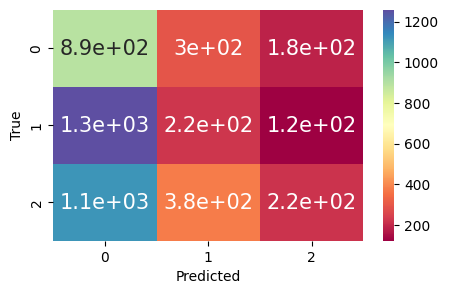

model_KNN
              precision    recall  f1-score   support

          -1       0.28      0.46      0.35      1370
           0       0.35      0.33      0.34      1600
           1       0.38      0.21      0.27      1713

    accuracy                           0.33      4683
   macro avg       0.34      0.33      0.32      4683
weighted avg       0.34      0.33      0.32      4683



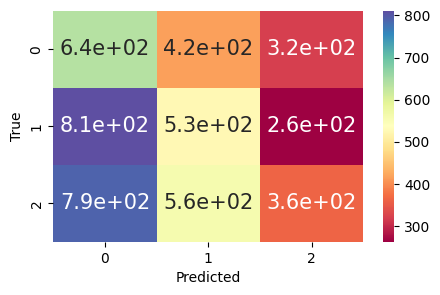

model_Logistic
              precision    recall  f1-score   support

          -1       0.28      0.48      0.36      1370
           0       0.35      0.08      0.13      1600
           1       0.38      0.44      0.41      1713

    accuracy                           0.33      4683
   macro avg       0.34      0.33      0.30      4683
weighted avg       0.34      0.33      0.30      4683



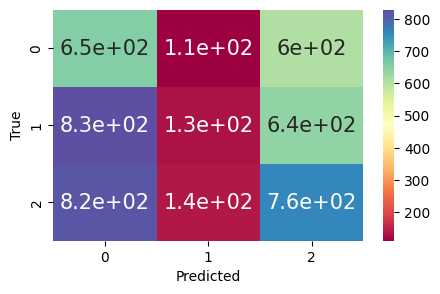

model_NaiveBayes
              precision    recall  f1-score   support

          -1       0.29      1.00      0.45      1370
           0       0.00      0.00      0.00      1600
           1       0.00      0.00      0.00      1713

    accuracy                           0.29      4683
   macro avg       0.10      0.33      0.15      4683
weighted avg       0.09      0.29      0.13      4683



C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

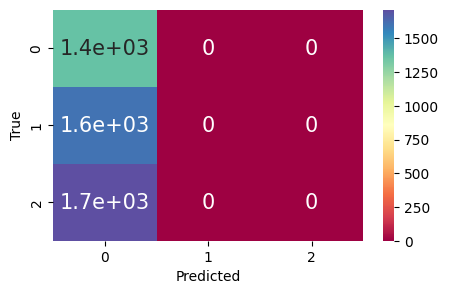

model_SVC
              precision    recall  f1-score   support

          -1       0.29      1.00      0.45      1370
           0       0.33      0.00      0.00      1600
           1       0.00      0.00      0.00      1713

    accuracy                           0.29      4683
   macro avg       0.21      0.33      0.15      4683
weighted avg       0.20      0.29      0.13      4683



C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

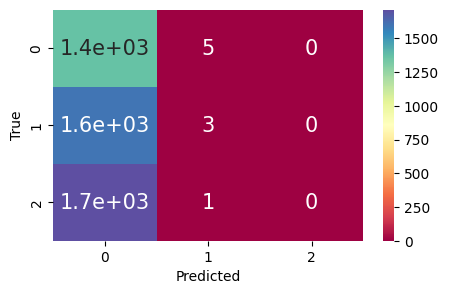

In [25]:
instance1.report()

In [12]:
class multiple_training2():
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.methods = []
        self.models = []
        self.feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]

    def report(self):
        for num, model in enumerate(self.models):
            print(self.methods[num])
            ypred = model.predict(self.X_test)

            # Classification report
            print(classification_report(self.y_test, ypred))

            # Confusion matrix
            cf_matrix = confusion_matrix(self.y_test, ypred)
            plt.figure(figsize=(5, 3))
            sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 15}, cmap="Spectral")
            plt.ylabel('True')
            plt.xlabel('Predicted')
            plt.show()
            
            # Feature importance
            if hasattr(model.best_estimator_, 'feature_importances_'):
                importances = model.best_estimator_.feature_importances_
                self.plot_feature_importance(importances, self.feature_names, title=f"Feature Importance for {self.methods[num]}")
            elif hasattr(model.best_estimator_, 'coef_'):
                importances = model.best_estimator_.coef_[0]
                self.plot_feature_importance(importances, self.feature_names, title=f"Feature Importance for {self.methods[num]}")
                
    def plot_feature_importance(self, importances, feature_names, title="Feature Importance"):
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(12, 6))
        plt.title(title)
        plt.bar(range(len(importances)), importances[indices], align='center')
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()
            
    def plot_learning_curve(self, estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
        plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")

        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_macro')

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        plt.show()
    
    def run(self):
        self.methods = [method for method in dir(self) if callable(getattr(self, method)) and method.startswith("model")]
        print(self.methods)
        self.models = [getattr(self, method_name)() for method_name in self.methods]

    def plot_all_learning_curves(self):
        for num, model in enumerate(self.models):
            self.plot_learning_curve(model.best_estimator_, f"Learning Curve for {self.methods[num]}", self.X_train, self.y_train, cv=5, n_jobs=-1)

    def model_Logistic(self):
        pipe_Logistic = imbpipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', RFECV(estimator=LogisticRegression(max_iter=2000), step=1, cv=5, scoring='f1_macro')),
            ('Logistic', LogisticRegression(random_state=2024, max_iter=2000, solver='lbfgs'))
        ])
        grid_params_Logistic = {'Logistic__C': [1, 2, 3, 4], 'Logistic__solver': ['newton-cg', 'lbfgs']}
        self.CV_Logistic = GridSearchCV(estimator=pipe_Logistic, param_grid=grid_params_Logistic, cv=5, scoring='f1_macro', verbose=1, n_jobs=1)
        self.CV_Logistic.fit(self.X_train, self.y_train)
        return self.CV_Logistic

    def model_KNN(self):
        pipe_KNNclass = imbpipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', RFECV(estimator=KNeighborsClassifier(), step=1, cv=5, scoring='f1_macro')),
            ('KNNclass', KNeighborsClassifier())
        ])
        grid_params_KNNclass = {'KNNclass__n_neighbors': [i for i in range(1, 7)]}
        self.CV_KNNclass = GridSearchCV(estimator=pipe_KNNclass, param_grid=grid_params_KNNclass, cv=5, scoring='f1_macro', verbose=1)
        self.CV_KNNclass.fit(self.X_train, self.y_train)
        print(f"Best k for KNN: {self.CV_KNNclass.best_params_['KNNclass__n_neighbors']}")
        return self.CV_KNNclass

    def model_SVC(self):
        pipe_SVC = imbpipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', RFECV(estimator=SVC(kernel='linear'), step=1, cv=5, scoring='f1_macro')),
            ('pca', PCA(n_components=30)),  # Reduce dimensionality
            ('SVC', SVC(max_iter=10000))  # Further increased max_iter
        ])
        grid_params_SVC = {'SVC__C': [0.1, 1, 10, 100], 'SVC__kernel': ['linear', 'rbf']}
        self.CV_SVC = GridSearchCV(estimator=pipe_SVC, param_grid=grid_params_SVC, cv=3, scoring='f1_macro', verbose=1)
        self.CV_SVC.fit(self.X_train, self.y_train)
        return self.CV_SVC
    def model_RandomForest(self):
        pipe_RandomForest = imbpipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', RFECV(estimator=RandomForestClassifier(), step=1, cv=5, scoring='f1_macro')),
            ('RandomForest', RandomForestClassifier(random_state=2024))
        ])
        grid_params_RandomForest = {'RandomForest__n_estimators': [100, 200, 300], 'RandomForest__max_depth': [None, 10, 20, 30]}
        self.CV_RandomForest = GridSearchCV(estimator=pipe_RandomForest, param_grid=grid_params_RandomForest, cv=5, scoring='f1_macro', verbose=1)
        self.CV_RandomForest.fit(self.X_train, self.y_train)
        return self.CV_RandomForest

    # def model_GradientBoosting(self):
    #     pipe_GradientBoosting = imbpipeline([
    #         ('scaler', StandardScaler()),
    #         ('feature_selection', RFECV(estimator=GradientBoostingClassifier(random_state=2024), step=1, cv=5, scoring='f1_macro')),
    #         ('GradientBoosting', GradientBoostingClassifier(random_state=2024))
    #     ])
    #     grid_params_GradientBoosting = {'GradientBoosting__n_estimators': [100, 200, 300], 'GradientBoosting__learning_rate': [0.01, 0.1, 0.2], 'GradientBoosting__max_depth': [3, 5, 7]}
    #     self.CV_GradientBoosting = GridSearchCV(estimator=pipe_GradientBoosting, param_grid=grid_params_GradientBoosting, cv=5, scoring='f1_macro', verbose=1)
    #     self.CV_GradientBoosting.fit(self.X_train, self.y_train)
    #     return self.CV_GradientBoosting
    def model_DecisionTree(self):
        pipe_DecisionTree = imbpipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', RFECV(estimator=DecisionTreeClassifier(), step=1, cv=5, scoring='f1_macro')),
            ('DecisionTree', DecisionTreeClassifier(random_state=2024))
        ])
        grid_params_DecisionTree = {
            'DecisionTree__max_depth': [None, 10, 20, 30, 40, 50],
            'DecisionTree__min_samples_split': [2, 5, 10],
            'DecisionTree__min_samples_leaf': [1, 2, 4]
        }
        self.CV_DecisionTree = GridSearchCV(estimator=pipe_DecisionTree, param_grid=grid_params_DecisionTree, cv=5, scoring='f1_macro', verbose=1)
        self.CV_DecisionTree.fit(self.X_train, self.y_train)
        return self.CV_DecisionTree
    def model_NaiveBayes(self):
        pipe_NaiveBayes = imbpipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', RFECV(estimator=GaussianNB(), step=1, cv=5, scoring='f1_macro')),
            ('NaiveBayes', GaussianNB())
        ])
        self.CV_NaiveBayes = pipe_NaiveBayes
        self.CV_NaiveBayes.fit(self.X_train, self.y_train)
        return self.CV_NaiveBayes


In [13]:
instance2 = multiple_training2(X_train, y_train, X_test, y_test)
instance2.run() #train all model
instance2.models

['model_DecisionTree', 'model_KNN', 'model_Logistic', 'model_NaiveBayes', 'model_RandomForest', 'model_SVC']
Fitting 5 folds for each of 54 candidates, totalling 270 fits


KeyboardInterrupt: 

In [ ]:
instance2.report()

In [ ]:
instance2.plot_all_learning_curves()


model_DecisionTree
              precision    recall  f1-score   support

          -1       0.31      0.31      0.31      1059
           0       0.40      0.39      0.39      1286
           1       0.39      0.40      0.39      1373

    accuracy                           0.37      3718
   macro avg       0.36      0.36      0.36      3718
weighted avg       0.37      0.37      0.37      3718



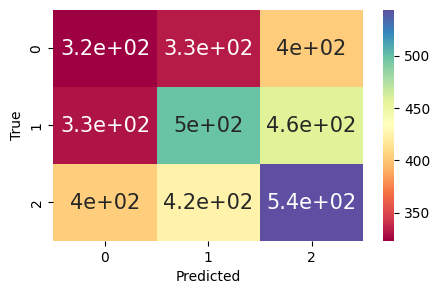

model_KNN
              precision    recall  f1-score   support

          -1       0.28      0.47      0.35      1059
           0       0.34      0.22      0.27      1286
           1       0.42      0.33      0.37      1373

    accuracy                           0.33      3718
   macro avg       0.34      0.34      0.33      3718
weighted avg       0.35      0.33      0.33      3718



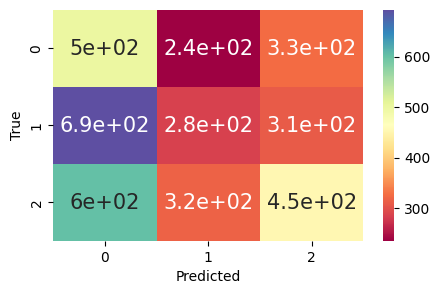

model_Logistic
              precision    recall  f1-score   support

          -1       0.28      0.38      0.33      1059
           0       0.43      0.21      0.28      1286
           1       0.38      0.46      0.41      1373

    accuracy                           0.35      3718
   macro avg       0.36      0.35      0.34      3718
weighted avg       0.37      0.35      0.34      3718



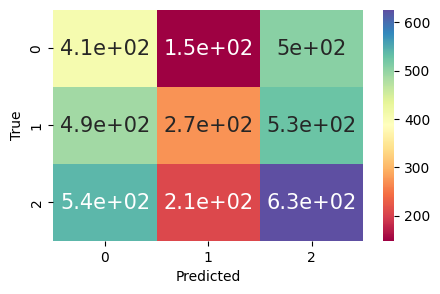

model_NaiveBayes
              precision    recall  f1-score   support

          -1       0.28      1.00      0.44      1059
           0       0.00      0.00      0.00      1286
           1       0.50      0.00      0.00      1373

    accuracy                           0.29      3718
   macro avg       0.26      0.33      0.15      3718
weighted avg       0.27      0.29      0.13      3718



C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

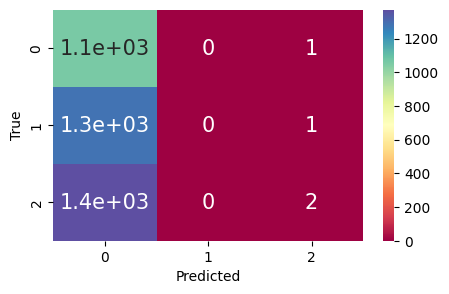

AttributeError: 'Pipeline' object has no attribute 'best_estimator_'

In [19]:
instance2.report()

In [ ]:
instance2.plot_all_learning_curves()


In [ ]:
instance2.plot_feature_importance()